In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Preprocessing

In [3]:
df.isna().sum().sum()

120

In [4]:
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [5]:
X = df.drop('medv', axis=1)
y = df['medv']

scaler = StandardScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reset indices for both X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (315, 13)
y_train shape: (315,)
X_test shape: (79, 13)
y_test shape: (79,)


# Build Network

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
10/10 [==============================] - 2s 58ms/step - loss: 194.0356 - val_loss: 56.6216
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 37.9465 - val_loss: 36.4526
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 29.6102 - val_loss: 29.2138
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 26.0428 - val_loss: 25.9012
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 24.4033 - val_loss: 24.4152
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 23.3507 - val_loss: 23.0693
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 22.9798 - val_loss: 22.0563
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 22.4466 - val_loss: 21.4347
Epoch 9/20
10/10 [==============================] - 0s 10ms/step - loss: 22.0630 - val_loss: 21.4266
Epoch 10/20
10/10 [==============================] - 0s 9ms/step - loss: 21.6429 - val_loss

In [17]:
predictions = model.predict(X_test).reshape(-1,)
result = pd.DataFrame()
result['Actual'] = y_test.values
result['Predictions'] = predictions
result

3/3 [==============================] - 0s 4ms/step


,Actual,Predictions
0,13.6,12.482627
1,19.2,23.145926
2,13.5,13.457044
3,34.7,32.039429
4,37.2,33.039452
...,...,...
74,24.7,25.942383
75,22.8,25.293474
76,10.2,15.187303
77,31.6,32.594643


In [20]:
result['Error'] = abs(result['Actual'] - result['Predictions'])

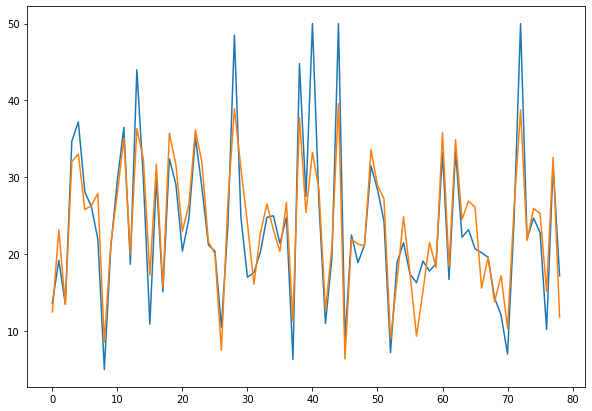

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(result['Actual'], label='Actual')
plt.plot(result['Predictions'], label='Prediction')
plt.show()